In [79]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV #Needed for splitting data into train and test sets, hyper paramter tuning
from sklearn.linear_model import LinearRegression #Needed for using LinearRegressor


#imports needed for polynomial regression
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#imports needed for neural network regressor
from sklearn.neural_network import MLPRegressor
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

#imports needed for Ensemble 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score,mean_squared_error #metrics for evaluation

#imports needed for saving the model
import pickle

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/ravirajdasari/datasets/main/winequality-red.csv')

EXploratory Data Analysis(EDA)

In [28]:
df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [32]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [33]:
#feature set should have all columns exceppt the target column
X = df.drop('quality',axis=1) 

#target has the value which needs to be predicted
y = df['quality']

In [34]:
#Splitting data into train and test datasets ( 80% train and 20% test)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
print(f"X_train {len(X_train)},X_test {len(X_test)},y_train {len(y_train)},y_test {len(y_test)}")

X_train 1279,X_test 320,y_train 1279,y_test 320


In [41]:
from sklearn.utils import all_estimators
estimators = all_estimators(type_filter='regressor')

for x in estimators:
  print(f"{x[0]} {x[1]}")

ARDRegression <class 'sklearn.linear_model._bayes.ARDRegression'>
AdaBoostRegressor <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>
BaggingRegressor <class 'sklearn.ensemble._bagging.BaggingRegressor'>
BayesianRidge <class 'sklearn.linear_model._bayes.BayesianRidge'>
CCA <class 'sklearn.cross_decomposition._cca.CCA'>
DecisionTreeRegressor <class 'sklearn.tree._classes.DecisionTreeRegressor'>
DummyRegressor <class 'sklearn.dummy.DummyRegressor'>
ElasticNet <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
ElasticNetCV <class 'sklearn.linear_model._coordinate_descent.ElasticNetCV'>
ExtraTreeRegressor <class 'sklearn.tree._classes.ExtraTreeRegressor'>
ExtraTreesRegressor <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>
GaussianProcessRegressor <class 'sklearn.gaussian_process._gpr.GaussianProcessRegressor'>
GradientBoostingRegressor <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
HistGradientBoostingRegressor <class 'sklearn.ensemble._hist_gradient

#Linear Regression

In [42]:
#Training
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
#Model Evaluation
y_pred = lr.predict(X_test)
print(f"r2 score is {r2_score(y_test,y_pred)}")
print(f"mean squared error  is {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2 score is 0.40318034127962266
mean squared error  is 0.6245199307980126


#Polynomial Regression

In [58]:
#Training
degree=3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [59]:
#Model Evaluation
y_pred = polyreg.predict(X_test)
print(f"r2 score is {r2_score(y_test,y_pred)}")
print(f"mean squared error  is {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2 score is -0.14054400070969075
mean squared error  is 0.8633378176234301


R2  is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line

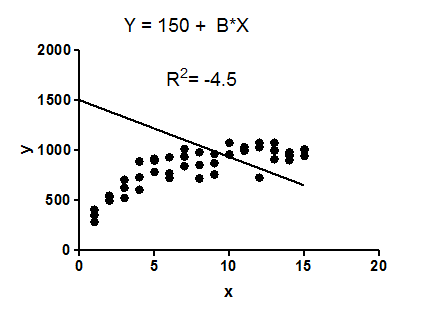

##Other standard models (Neural networks and Decision Tress)

#Neural networks
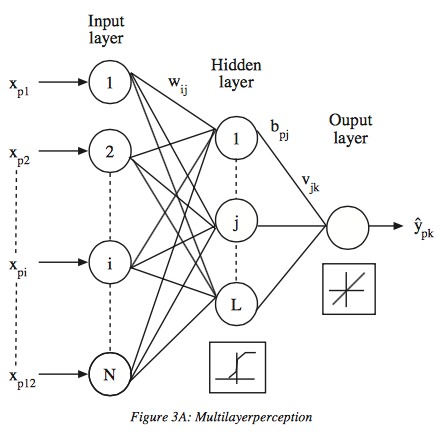

In [61]:
#training
mlp = MLPRegressor()
mlp.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [62]:
#Model Evaluation
y_pred = mlp.predict(X_test)
print(f"r2 score is {r2_score(y_test,y_pred)}")
print(f"mean squared error  is {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2 score is 0.37328663358243497
mean squared error  is 0.6399694188807072


In [73]:
#Hyper paramter tuning
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

neural  = MLPRegressor()
params = {
    'hidden_layer_sizes':[(10,),(50,),(100,)],
    'activation':['relu','tanh','logistic'],
    'learning_rate':['constant','invscaling','adaptive']
}

grid_neu = GridSearchCV(neural,params,cv=5,scoring='r2')

grid_neu.fit(X_train,y_train)

print_results(grid_neu)

BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}

0.086 (+/-0.293) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.143 (+/-0.172) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.138 (+/-0.223) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.276 (+/-0.15) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.267 (+/-0.165) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.244 (+/-0.171) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.274 (+/-0.176) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.266 (+/-0.177) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.227 (+/-0.268) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learni

#Ensemble Algorithms

Random Forest Prediction


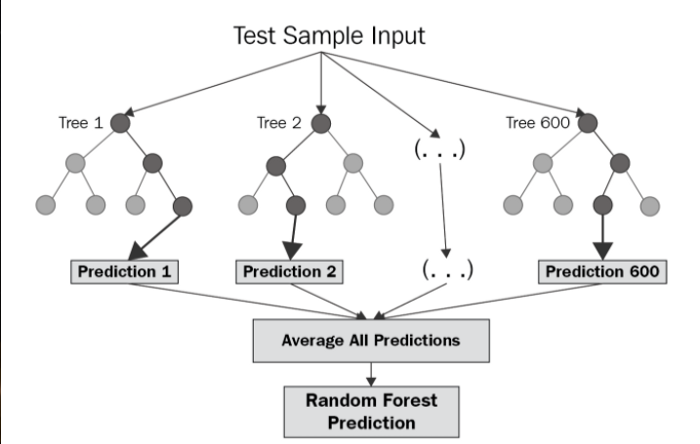

In [77]:
rf = RandomForestClassifier()

#get hyperparameters
rf.get_params().keys()

params = {
    'n_estimators':[5,10,50,100,500],
    'max_depth':[2,4,8,16,32,None]
}
grid_rf = GridSearchCV(rf,params,cv=5,scoring='r2')
grid_rf.fit(X_train,y_train)

print_results(grid_rf)

BEST PARAMS: {'max_depth': 32, 'n_estimators': 500}

0.078 (+/-0.279) for {'max_depth': 2, 'n_estimators': 5}
0.121 (+/-0.213) for {'max_depth': 2, 'n_estimators': 10}
0.176 (+/-0.235) for {'max_depth': 2, 'n_estimators': 50}
0.18 (+/-0.168) for {'max_depth': 2, 'n_estimators': 100}
0.189 (+/-0.182) for {'max_depth': 2, 'n_estimators': 500}
0.185 (+/-0.191) for {'max_depth': 4, 'n_estimators': 5}
0.223 (+/-0.148) for {'max_depth': 4, 'n_estimators': 10}
0.216 (+/-0.179) for {'max_depth': 4, 'n_estimators': 50}
0.235 (+/-0.185) for {'max_depth': 4, 'n_estimators': 100}
0.231 (+/-0.157) for {'max_depth': 4, 'n_estimators': 500}
0.229 (+/-0.167) for {'max_depth': 8, 'n_estimators': 5}
0.236 (+/-0.109) for {'max_depth': 8, 'n_estimators': 10}
0.281 (+/-0.164) for {'max_depth': 8, 'n_estimators': 50}
0.313 (+/-0.155) for {'max_depth': 8, 'n_estimators': 100}
0.313 (+/-0.185) for {'max_depth': 8, 'n_estimators': 500}
0.128 (+/-0.258) for {'max_depth': 16, 'n_estimators': 5}
0.256 (+/-0.162) 

In [78]:
#Model Evaluation
y_pred = grid_rf.predict(X_test)
print(f"r2 score is {r2_score(y_test,y_pred)}")
print(f"mean squared error  is {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2 score is 0.4213900387035072
mean squared error  is 0.6149186938124421


In [80]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
803,6,5
124,5,5
350,6,5
682,5,5
1326,6,6
...,...,...
1259,6,6
1295,5,5
1155,5,5
963,6,6


In [81]:
#Save model
pickle.dump(grid_rf.best_estimator_, open('model.pkl', 'wb'))